<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/Final_Exam_Qs_Caleb_Monroe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Final Exam - DS 325 Applied Data Science

In this final exercise, you will be asked to categorize some data and train several classification models to make predictions in these categories and compare/discuss your models' performances.  
_________________________________________________________



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.mixture import GaussianMixture

from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV


import itertools
from itertools import permutations

#define the default font sizes to make the figures prettier
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
def class_performance(xdata,ydata,model):
  print("\n\nPerformance for model: ",model)
# Classifiers with the score method output accuracy by default
  predy = model.predict(xdata)
  acc = accuracy_score(predy,ydata)
  prec, rec, fscore, supp = precision_recall_fscore_support(ydata, predy, average=None, zero_division=0)
  print("\nmodel accuracy on supplied data:\t", round(acc, 3))

  print("Precision:\t", prec.round(3), "\nRecall:\t\t", rec.round(3), "\nFscore:\t\t", fscore.round(3), "\nSupport:\t", supp)

## A New Dataset - Demographics, Personality, and Drug Use




## General Data description

This dataset contains samples for 1885 respondents and records demographic, personality, and history of drug use information. For each respondent, 12 attributes are measured: **5 Personality measurements** (the so-called BIG 5) which include **NEO-FFI-R** (**neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness**), **impulsivity/risky behavior measurements**:  **BIS-11** (impulsivity) and **ImpSS (sensation seeking)**, along with **other demographic information** (level of education, age, gender, country of residence and ethnicity.) All input attributes were originally categorical and have been transformed and scaled to have a mean value of zero.  

The dataset features may be broadly categorized as being **Demographic**, **Personality**, **Risk-seeking**; more detailed descriptions for each category and feature are available below.

In addition to the above **personality**, **risk-seeking**, and **demographic** information, participants were questioned concerning their **use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse (inhalents), for a total of 18 possible drug targets**, along with one fictitious drug (**Semeron**) which was introduced to identify over-claimers.

Each drug target can have 1 of 7 responses: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".  These categorical responses will be encoded below as numbers 0-6.

The original dataset acquisition and analysis is described in this 2015 paper:

[Arxiv Link](https://arxiv.org/abs/1506.06297)








## Feature Categories and Descriptions

### Demographic Traits

The following features could all be included in the broader category of  **Demographic data**

**Age**: the age of participant and has one of the values:

Value	Meaning	Cases	Fraction (order increasing age)

* -0.95197 18-24	643	34.11%
* -0.07854	25-34	481	25.52%
* 0.49788 35-44	356	18.89%
* 1.09449  45-54	294	15.60%
* 1.82213  55-64	93	4.93%
* 2.59171  65+	  18	0.95%


**Gender**: gender of participant(male neg, fem pos)

Value	Meaning	Cases	Fraction
* 0.48246	Female	942	49.97%
* -0.48246	Male	943	50.03%


**Education**: level of education of participant (order increasing education)

Value	Meaning	Cases	Fraction
* -2.43591	Left School Before 16 years	28	1.49%
* -1.73790	Left School at 16 years	99	5.25%
* -1.43719	Left School at 17 years	30	1.59%
* -1.22751	Left School at 18 years	100	5.31%
* -0.61113	Some College,No Certificate Or Degree	506	26.84%
* -0.05921	Professional Certificate/ Diploma	270	14.32%
* 0.45468	University Degree	480	25.46%
* 1.16365	Masters Degree	283	15.01%
* 1.98437	Doctorate Degree	89	4.72%


**Country**: country of current residence of participant and has one of the values:

Value	Meaning	Cases	Fraction
* -0.09765	Australia	54	2.86%
* 0.24923	Canada	87	4.62%
* -0.46841	New Zealand	5	0.27%
* -0.28519	Other	118	6.26%
* 0.21128	Republic of Ireland	20	1.06%
* 0.96082	UK	1044	55.38%
* -0.57009	USA	557	29.55%


**Ethnicity**: ethnicity of participant and has one of the values:

Value	Meaning	Cases	Fraction
* -0.50212	Asian	26	1.38%
* -1.10702	Black	33	1.75%
* 1.90725	Mixed-Black/Asian	3	0.16%
* 0.12600	Mixed-White/Asian	20	1.06%
* -0.22166	Mixed-White/Black	20	1.06%
* 0.11440	Other	63	3.34%
* -0.31685	White	1720	91.25%


### Big 5 Personality Traits

The following features are personality traits identified in psychology as the BIG 5:  They are Neuroticism, Extraversion, Openness, Agreeableness, and Conscientiousness



---


**Nscore**: Nscore is NEO-FFI-R Neuroticism.

Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness. Possible values are presented in table below:

* Nscore	Value	Nscore	Value	Nscore	Value	Nscore	Value
* 12	-3.46436	24	-1.32828	36	0.04257	48	1.23461
* 13	-3.15735	25	-1.19430	37	0.13606	49	1.37297
* 14	-2.75696	26	-1.05308	38	0.22393	50	1.49158
* 15	-2.52197	27	-0.92104	39	0.31287	51	1.60383
* 16	-2.42317	28	-0.79151	40	0.41667	52	1.72012
* 17	-2.34360	29	-0.67825	41	0.52135	53	1.83990
* 18	-2.21844	30	-0.58016	42	0.62967	54	1.98437
* 19	-2.05048	31	-0.46725	43	0.73545	55	2.12700
* 20	-1.86962	32	-0.34799	44	0.82562	56	2.28554
* 21	-1.69163	33	-0.24649	45	0.91093	57	2.46262
* 22	-1.55078	34	-0.14882	46	1.02119	58	2.61139
* 23	-1.43907	35	-0.05188	47	1.13281	59	2.82196
* -	-	-	-	-	-	60	3.27393



---


**EScore**: Escore (Real) is NEO-FFI-R Extraversion. Extraversion is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy. Possible values are presented in table below:

* Escore	Value	Escore	Value	Escore	Value	Escore	Value
* 16	-3.27393	27	-1.76250	38	-0.30033	49	1.45421
* 17	-3.00537	28	-1.63340	39	-0.15487	50	1.58487
* 18	-3.00537	29	-1.50796	40	0.00332	51	1.74091
* 19	-2.72827	30	-1.37639	41	0.16767	52	1.93886
* 20	-2.53830	31	-1.23177	42	0.32197	53	2.12700
* 21	-2.44904	32	-1.09207	43	0.47617	54	2.32338
* 22	-2.32338	33	-0.94779	44	0.63779	55	2.57309
* 23	-2.21069	34	-0.80615	45	0.80523	56	2.85950
* 24	-2.11437	35	-0.69509	46	0.96248	57	2.85950
* 25	-2.03972	36	-0.57545	47	1.11406	58	3.00537
* 26	-1.92173	37	-0.43999	48	1.28610	59	3.27393

---

**Oscore**: Oscore (Real) is NEO-FFI-R Openness to experience. Openness is one of the five personality traits of the Big Five personality theory. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine. Possible values are presented in table below:

* Oscore	Value	Oscore	Value	Oscore	Value
* 24	-3.27393	38	-1.11902	50	0.58331
* 26	-2.85950	39	-0.97631	51	0.72330
* 28	-2.63199	40	-0.84732	52	0.88309
* 29	-2.39883	41	-0.71727	53	1.06238
* 30	-2.21069	42	-0.58331	54	1.24033
* 31	-2.09015	43	-0.45174	55	1.43533
* 32	-1.97495	44	-0.31776	56	1.65653
* 33	-1.82919	45	-0.17779	57	1.88511
* 34	-1.68062	46	-0.01928	58	1.15324
* 35	-1.55521	47	0.14143	59	2.44904
* 36	-1.42424	48	0.29338	60	2.90161
* 37	-1.27553	49	0.44585	NaN	NaN


---

**Ascore**: Ascore(Real) is NEO-FFI-R Agreeableness. Agreeableness is one of the five personality traits of the Big Five personality theory. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others. Possible values are presented in table below:

* Ascore	Value	Ascore	Value	Ascore	Value
* 12	-3.46436	34	-1.34289	48	0.76096
* 16	-3.15735	35	-1.21213	49	0.94156
* 18	-3.00537	36	-1.07533	50	1.11406
* 23	-2.90161	37	-0.91699	51	1.2861
* 24	-2.78793	38	-0.76096	52	1.45039
* 25	-2.70172	39	-0.60633	53	1.61108
* 26	-2.53830	40	-0.45321	54	1.81866
* 27	-2.35413	41	-0.30172	55	2.03972
* 28	-2.21844	42	-0.15487	56	2.23427
* 29	-2.07848	43	-0.01729	57	2.46262
* 30	-1.92595	44	0.13136	58	2.75696
* 31	-1.77200	45	0.28783	59	3.15735
* 32	-1.62090	46	0.43852	60	3.46436
* 33	-1.47955	47	0.59042	NaN	NaN

---

**Cscore**: Cscore (Real) is NEO-FFI-R Conscientiousness. Conscientiousness is one of the five personality traits of the Big Five personality theory. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation. Possible values are presented in table below:

* Cscore	Value	Cscore	Value	Cscore	Value
* 17	-3.46436	32	-1.25773	46	0.58489
* 19	-3.15735	33	-1.13788	47	0.7583
* 20	-2.90161	34	-1.01450	48	0.93949
* 21	-2.72827	35	-0.89891	49	1.13407
* 22	-2.57309	36	-0.78155	50	1.30612
* 23	-2.42317	37	-0.65253	51	1.46191
* 24	-2.30408	38	-0.52745	52	1.63088
* 25	-2.18109	39	-0.40581	53	1.81175
* 26	-2.04506	40	-0.27607	54	2.04506
* 27	-1.92173	41	-0.14277	55	2.33337
* 28	-1.78169	42	-0.00665	56	2.63199
* 29	-1.64101	43	0.12331	  57	3.00537
* 30	-1.51840	44	0.25953   59	3.46436
* 31	-1.38502	45	0.41594	  NaN	NaN


### Risk-seeking


**Impulsivity and sensation seeking (SS)** are personality traits that appear to influence risk-taking generally, and substance use processes more specifically. Moeller and colleagues have defined impulsivity as a tendency to act quickly without thinking ahead about consequences; Zuckerman has defined sensation seeking as a tendency to take risks in order to seek out novel, stimulating experiences.

---

**Impulsive**: impulsiveness measured by BIS-11. In psychology, impulsivity (or impulsiveness) is a tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences. If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first. Possible values are presented in table below:


* Impulsiveness	Cases	Fraction
* -2.55524	20	1.06%
* -1.37983	276	14.64%
* -0.71126	307	16.29%
* -0.21712	355	18.83%
* 0.19268	257	13.63%
* 0.52975	216	11.46%
* 0.88113	195	10.34%
* 1.29221	148	7.85%
* 1.86203	104	5.52%
* 2.90161	7	0.37%



---


**SS**: is sensation seeking measured by ImpSS. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations. In other words, senses are the physiological basis of perception. Possible values are presented in table below:

* SS    Cases	   Fraction
* -2.07848	71	3.77%
* -1.54858	87	4.62%
* -1.18084	132	7.00%
* -0.84637	169	8.97%
* -0.52593	211	11.19%
* -0.21575	223	11.83%
* 0.07987	219	11.62%
* 0.40148	249	13.21%
* 0.76540	211	11.19%
* 1.22470	210	11.14%
* 1.92173	103	5.46%


### Drug Use

These 18 drugs can be grouped into 4 categories based on their use and legality:

**Category 4 drugs** (Commonly used and not controlled/regulated)
* Caffeine, Chocolate

**Category 3 drugs** (Recreationally used and partly controlled/regulated)
* Alcohol, Cannabis, Nicotine

**Category 2 drugs** (Mostly Illegal, mostly non-habit forming)
* Amyl Nitrate, Benzos, Ecstasy, Legalh, LSD, Mushrooms

**Category 1 drugs** (Illegal, highly addicative/habit-forming)
* Amphetamines, Coke, Crack, Heroin, Ketamine, Methodone, VSA


**There are also a non-substance drug listed**
* Semer - this is a non-existent drug that was mean to catch people who just answered yes to everything

Each subject's response to each drug could be any one of:
* CL0	Never Used
* CL1	Used over a Decade Ago
* CL2	Used in Last Decade
* CL3	Used in Last Year
* CL4	Used in Last Month
* CL5	Used in Last Week
* CL6	Used in Last Day

As part of the initial data setup, we will encode these categorical responses a 0-6 with increasing useage

##Your Tasks
**Part A:**  Categorize and encode your data features and targets

Separate your dataset features into the 3 categories described above ( **Demographics**, **Personality**, **Risk-Seeking**)


Separate your drug targets into the **4 drug categories described above:  (Cat4: legal/soft, Cat3: controlled/soft, Cat2: controlled/medium, Cat1: controlled/hard**

Below, I have included a section that will encode the categorical drug useage responses to make them numerical.  **For your categorical classification exercise, you should only be concerned with whether a person has ever used any of the the drug(s) in the category, not their degree of use.**  

Your next task will be to model the relationships between these categorical features and targets that you have defined.  


_________________________________________________________

**Part B:** Train your best classification models to predict whether a person has ever used each category of drug.  You should explore 3 different classification models.  One should be a Neural Network, while the other two may be chosen from among Logistic(Softmax), Stochastic Gradient Descent, Support Vector Machine, or Decision Tree.
_________________________________________________________

**Part C:**  In a table, present the performances of your best models for each drug category.  Specifically, your table should follow this format:

| Drug Category | Best Feature Category | Model Type | Overall training accuracy | Overall testing accuracy |
|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Cat 1   |  Row 1   |  Model 1   |  Row 1   |  Row 1   |
|  Cat 2   |  Row 2   |  Model 2   |  Row 2   |  Row 2   |
|  Cat 3   |  Row 3   |  Model 3   |  Row 3   |  Row 3   |
|  Cat 4   |  Row 4   |  Model 4   |  Row 4   |  Row 4   |

_________________________________________________________


**Part D:** For each of the feature/drug combinations from part C (you should have 4 models, one for predicting each drug category's useage, each trained with the best features at predicting said category's useage, **choose one** of the following analyses to perform from which your discussion should follow:  
- **Separate your data by education level.**  Train your model using the same model/feature/drug categories as your best combination (you may change your model parameters).  Discuss the performance of your model at predicting useage for each education level in your sample.
- **Separate your data by age.**  Train your model using the same model/feature/drug categories as your best combination (you may change your model parameters).  Discuss the performance of your model at predicting useage for each age level in your sample.
- **Separate your data by sex.**  Train your model using the same model/feature/drug categories as your best combination (you may change your model parameters).  Discuss the performance of your model at predicting useage separately for men and women in your sample.



## Specific items to be sure to include

In your discussion you should:
 * describe what models you are exploring, and why they are preferred/appropriate for the analysis you're performing
 * clearly state what feature categories best predicted each target category  
 * keep testing accuracy in mind when optimizing, you want your model as generalizeable as possible
 * present the performance of your model on both the training and test set
 * summarize your train/test results into a single table for easy comparison of your models' performances
 * include in your discussion a target-level performance analysis of your classifier and its ability to predict/answer the original question you had


No matter your model, you should:
 * prepare your feature and target data before training (train/test split, scaling, and any other transformations)
 * demonstrate that you have explored statifying your sample
 * demonstrate that you have optimized your model parameter choice
 * include visualizations to help illustrate each model's performance
 * take care in presenting your results.  **All results and discussion should be written in markdown format at the end of your code.  Do not expect me to grade discussion written in the comments**  


You should use some of your time in class today/thursday to ask questions and narrow in on your methodology.  **From the time after receiving the dataset, you are not to speak about the exam or methods with anyone besides me until our final examination period has elapsed.**  



# Data Retrieval and Preparation

### Retrieving data, encoding drug responses

In [3]:
web_path = 'http://public.gettysburg.edu/~rjohnson/ds325/' #if using data over web
df_d = pd.read_csv(web_path+'drug_consumption.csv')

In [4]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [5]:
drugs = ["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke",
              "Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth",
              "Mushrooms","Nicotine","Semer","VSA"]

drugs_df = df_d[drugs]


In [6]:
# drugs_df before encoding
drugs_df

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [7]:
# We need to encode/tokenize all of the drug responses, so use LabelEncoder

# The following is written to train the label encoder on the Alcohol responses
# and use that same encoding on all the others
# This should work because all the drug responses are encoded identically
le_class = LabelEncoder()
drugs_enc = le_class.fit(drugs_df["Alcohol"])

d_tok=[]
# this populates our list d_tok with all of the encoded drug responses
for d in drugs_df:
#  print(d)
  d_tok.append(drugs_enc.transform(drugs_df[d]))
# now I'm replacing all of the responses in the drug array
# with the corresponding coded values
i=0
for d in drugs_df:
  drugs_df.loc[:,d] = d_tok[i]
  i+=1

In [8]:
# drugs_df after encoding
drugs_df

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,0,5
1881,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0,0
1882,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0,0
1883,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0,0


# Solution

# Part A

In [9]:
semers = df_d['Semer'] != 'CL0'#Finding cases where semer is positive
semers.head(100)
df_cleaned = df_d[~semers]#Creating df_cleaned

#Seeing how many individuals before and after semer removal
print("Number of rows before removing 'Semer':", len(df_d))
print("Number of rows after removing 'Semer':", len(df_cleaned))

Number of rows before removing 'Semer': 1885
Number of rows after removing 'Semer': 1877


In [10]:
demographics = ["Age","Gender","Education","Country","Ethnicity"] #Defining demographics

In [11]:
demographics_df = df_cleaned[demographics] #Making demographics df

In [12]:
demographics_df #Printing demographics df

,Age,Gender,Education,Country,Ethnicity
0,0.49788,0.48246,-0.05921,0.96082,0.12600
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685
3,-0.95197,0.48246,1.16365,0.96082,-0.31685
4,0.49788,0.48246,1.98437,0.96082,-0.31685
...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685


In [13]:
personalities = ["Nscore","Escore","Oscore","Ascore","Cscore"] #Defining personalities

In [14]:
personality_df = df_cleaned[personalities] #Making personalities df

In [15]:
personality_df #Printing personalities df

,Nscore,Escore,Oscore,Ascore,Cscore
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665
1,-0.67825,1.93886,1.43533,0.76096,-0.14277
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612
...,...,...,...,...,...
1880,-1.19430,1.74091,1.88511,0.76096,-1.13788
1881,-0.24649,1.74091,0.58331,0.76096,-1.51840
1882,1.13281,-1.37639,-1.27553,-1.77200,-1.38502
1883,0.91093,-1.92173,0.29338,-1.62090,-2.57309


In [16]:
risk_seeking = ["Impulsive","SS"] #Defining risk seeking

In [17]:
risk_seeking_df = df_cleaned[risk_seeking] #Making risk seeking dataframe

In [18]:
risk_seeking_df #Printing risk seeking dataframe

,Impulsive,SS
0,-0.21712,-1.18084
1,-0.71126,-0.21575
2,-1.37983,0.40148
3,-1.37983,-1.18084
4,-0.21712,-0.21575
...,...,...
1880,0.88113,1.92173
1881,0.88113,0.76540
1882,0.52975,-0.52593
1883,1.29221,1.22470


In [19]:
cat4_drugs = ["Caff", "Choc"] #Defining category 4 drugs

In [20]:
cat3_drugs = ["Alcohol", "Cannabis", "Nicotine"] #Defining category 3 drugs

In [21]:
cat2_drugs = ["Amyl", "Benzos", "Ecstasy", "Legalh", "LSD", "Mushrooms"] #Defining category 2 drugs

In [22]:
cat1_drugs = ["Amphet", "Coke", "Crack", "Heroin", "Ketamine", "Meth", "VSA"] #Defining category 1 drugs

In [23]:
non_substance = ["Semer"] #Defining semer drug as non-substance

In [24]:
for category, drugs in [('Cat4', cat4_drugs), ('Cat3', cat3_drugs), ('Cat2', cat2_drugs), ('Cat1', cat1_drugs)]:
    df_cleaned = df_cleaned.copy()  #making a copy to avoid SettingWithCopyWarning that appeared earlier
    df_cleaned.loc[:, category] = (df_cleaned[drugs] != 'CL0').any(axis=1).astype(int)
    #for loop to encode 1 or 0 if individual has used any of the types of drugs ever within each category

In [25]:
print("Cat4 (Legal/Soft):") #Printing results
print(df_cleaned['Cat4'].head())

print("\nCat3 (Controlled/Soft):")
print(df_cleaned['Cat3'].head())

print("\nCat2 (Controlled/Medium):")
print(df_cleaned['Cat2'].head())

print("\nCat1 (Controlled/Hard):")
print(df_cleaned['Cat1'].head())

Cat4 (Legal/Soft):
0    1
1    1
2    1
3    1
4    1
Name: Cat4, dtype: int64

Cat3 (Controlled/Soft):
0    1
1    1
2    1
3    1
4    1
Name: Cat3, dtype: int64

Cat2 (Controlled/Medium):
0    1
1    1
2    1
3    1
4    1
Name: Cat2, dtype: int64

Cat1 (Controlled/Hard):
0    1
1    1
2    0
3    1
4    1
Name: Cat1, dtype: int64


# Part B

## Modeling for category 4 drugs

### Demographics

In [26]:
drug_category = 'Cat4' #Defining category

In [27]:
X_demographics = demographics_df #Defining X features and y targets
y = df_cleaned[drug_category]

In [28]:
X_train_demographics, X_test_demographics, y_train, y_test = train_test_split(X_demographics, y, test_size=0.2, random_state=42, stratify=X_demographics['Age'])
#Train test split

In [29]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 5}


In [30]:
#Decision Tree
max_depth = 5
dt_model_demographics = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_dt_demographics = dt_model_demographics.predict(X_train_demographics) #Making / Evaluating predictions
y_test_pred_dt_demographics = dt_model_demographics.predict(X_test_demographics)
train_accuracy_dt_demographics = accuracy_score(y_train, y_train_pred_dt_demographics)
test_accuracy_dt_demographics = accuracy_score(y_test, y_test_pred_dt_demographics)

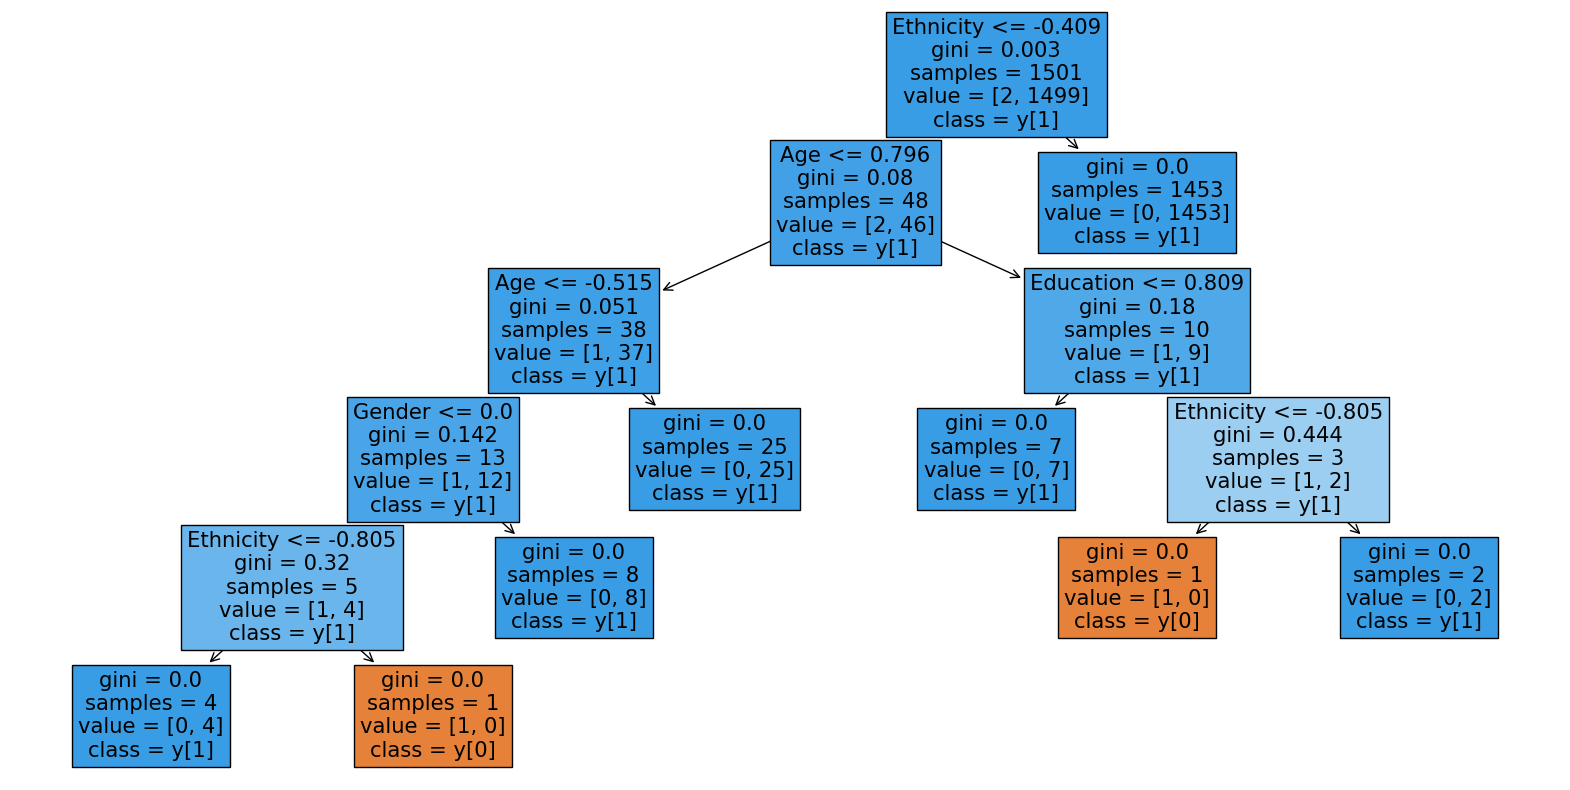

In [31]:
plt.figure(figsize=(20, 10)) #Visualizing Decision Tree
plot_tree(dt_model_demographics, filled=True, feature_names=X_train_demographics.columns, class_names=True)
plt.show()

In [32]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [33]:
#Neaural Network
learning_rate = 0.0001
nn_model_demographics = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_nn_demographics = nn_model_demographics.predict(X_train_demographics) #Making / Evaluating predictions
y_test_pred_nn_demographics = nn_model_demographics.predict(X_test_demographics)
train_accuracy_nn_demographics = accuracy_score(y_train, y_train_pred_nn_demographics)
test_accuracy_nn_demographics = accuracy_score(y_test, y_test_pred_nn_demographics)

In [34]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_demographics = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [35]:
#Stochastic Gradient Discent
learning_date = 0.0001
sgd_model_demographics = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_sgd_demographics = sgd_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_sgd_demographics = sgd_model_demographics.predict(X_test_demographics)
train_accuracy_sgd_demographics = accuracy_score(y_train, y_train_pred_sgd_demographics)
test_accuracy_sgd_demographics = accuracy_score(y_test, y_test_pred_sgd_demographics)

In [36]:
print("Demographics Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_demographics}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_demographics}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_demographics}")

Demographics Category:
Decision Tree Model:
Overall Training Accuracy: 1.0
Overall Testing Accuracy: 1.0
Neural Network Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0


### Personality

In [37]:
X_personality = personality_df
y = df_cleaned[drug_category]

In [38]:
X_train_personality, X_test_personality, y_train, y_test = train_test_split(X_personality, y, test_size=0.2, random_state=42)
#Train test split

In [39]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [40]:
#Decision Tree
max_depth = 3
dt_model_personality = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_personality.fit(X_train_personality, y_train)
y_train_pred_dt_personality = dt_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_dt_personality = dt_model_personality.predict(X_test_personality)
train_accuracy_dt_personality = accuracy_score(y_train, y_train_pred_dt_personality)
test_accuracy_dt_personality = accuracy_score(y_test, y_test_pred_dt_personality)

In [41]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [42]:
#Neaural Network
learning_rate = 0.0001
nn_model_personality = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_personality.fit(X_train_personality, y_train)
y_train_pred_nn_personality = nn_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_nn_personality = nn_model_personality.predict(X_test_personality)
train_accuracy_nn_personality = accuracy_score(y_train, y_train_pred_nn_personality)
test_accuracy_nn_personality = accuracy_score(y_test, y_test_pred_nn_personality)

In [43]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_personality = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [44]:
#Stochastic Gradient Discent
learning_date = 0.0001
sgd_model_demographics = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_personality.fit(X_train_personality, y_train)
y_train_pred_sgd_personality = sgd_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_sgd_personality = sgd_model_personality.predict(X_test_personality)
train_accuracy_sgd_personality = accuracy_score(y_train, y_train_pred_sgd_personality)
test_accuracy_sgd_personality = accuracy_score(y_test, y_test_pred_sgd_personality)

In [45]:
print("Personality Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personality}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_personality}")

Personality Category:
Decision Tree Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0
Neural Network Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 0.9973404255319149


### Risk-seeking

In [46]:
X_risk_seeking = risk_seeking_df#defining X and y
y = df_cleaned[drug_category]

In [47]:
X_train_risk_seeking, X_test_risk_seeking, y_train, y_test = train_test_split(X_risk_seeking, y, test_size=0.2, random_state=42)
#Train test split

In [48]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [49]:
#Decision Tree
max_depth = 3
dt_model_risk_seeking = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_dt_risk_seeking = accuracy_score(y_train, y_train_pred_dt_risk_seeking)
test_accuracy_dt_risk_seeking = accuracy_score(y_test, y_test_pred_dt_risk_seeking)

In [50]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [51]:
#Neural Network
learning_rate = 0.0001
nn_model_risk_seeking = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_nn_risk_seeking = accuracy_score(y_train, y_train_pred_nn_risk_seeking)
test_accuracy_nn_risk_seeking = accuracy_score(y_test, y_test_pred_nn_risk_seeking)

In [52]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_risk_seeking = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [53]:
#Stochastic Gradient Descent
learning_date = 0.0001
sgd_model_risk_seeking = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_sgd_risk_seeking = accuracy_score(y_train, y_train_pred_sgd_risk_seeking)
test_accuracy_sgd_risk_seeking = accuracy_score(y_test, y_test_pred_sgd_risk_seeking)

In [54]:
print("Risk-Seeking Category:") #Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_risk_seeking}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_risk_seeking}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_risk_seeking}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_risk_seeking}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_risk_seeking}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_risk_seeking}")

Risk-Seeking Category:
Decision Tree Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0
Neural Network Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.9986675549633578
Overall Testing Accuracy: 1.0


## Modeling for category 3 drugs

### Demographics

In [55]:
drug_category = 'Cat3' #Defining category

In [56]:
X_demographics = demographics_df #Defining X features and y targets
y = df_cleaned[drug_category]

In [57]:
X_train_demographics, X_test_demographics, y_train, y_test = train_test_split(X_demographics, y, test_size=0.2, random_state=42, stratify=X_demographics['Age'])
#Train test split

In [58]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [59]:
#Decision Tree
max_depth = 3
dt_model_demographics = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_dt_demographics = dt_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_dt_demographics = dt_model_demographics.predict(X_test_demographics)
train_accuracy_dt_demographics = accuracy_score(y_train, y_train_pred_dt_demographics)
test_accuracy_dt_demographics = accuracy_score(y_test, y_test_pred_dt_demographics)

In [60]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [61]:
#Neaural Network
learning_rate = 0.0001
nn_model_demographics = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_nn_demographics = nn_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_nn_demographics = nn_model_demographics.predict(X_test_demographics)
train_accuracy_nn_demographics = accuracy_score(y_train, y_train_pred_nn_demographics)
test_accuracy_nn_demographics = accuracy_score(y_test, y_test_pred_nn_demographics)

In [62]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_demographics = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [63]:
#Stochastic Gradient Discent
learning_date = 0.0001
sgd_model_demographics = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_sgd_demographics = sgd_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_sgd_demographics = sgd_model_demographics.predict(X_test_demographics)
train_accuracy_sgd_demographics = accuracy_score(y_train, y_train_pred_sgd_demographics)
test_accuracy_sgd_demographics = accuracy_score(y_test, y_test_pred_sgd_demographics)

In [64]:
print("Demographics Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_demographics}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_demographics}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_demographics}")

Demographics Category:
Decision Tree Model:
Overall Training Accuracy: 0.9906728847435043
Overall Testing Accuracy: 0.9920212765957447
Neural Network Model:
Overall Training Accuracy: 0.9906728847435043
Overall Testing Accuracy: 0.9920212765957447
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.9906728847435043
Overall Testing Accuracy: 0.9920212765957447


### Personality

In [65]:
X_personality = personality_df#Defining X and y
y = df_cleaned[drug_category]

In [66]:
X_train_personality, X_test_personality, y_train, y_test = train_test_split(X_personality, y, test_size=0.2, random_state=42)
#Train test split

In [67]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [68]:
#Decision Tree
max_depth = 3
dt_model_personality = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_personality.fit(X_train_personality, y_train)
y_train_pred_dt_personality = dt_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_dt_personality = dt_model_personality.predict(X_test_personality)
train_accuracy_dt_personality = accuracy_score(y_train, y_train_pred_dt_personality)
test_accuracy_dt_personality = accuracy_score(y_test, y_test_pred_dt_personality)

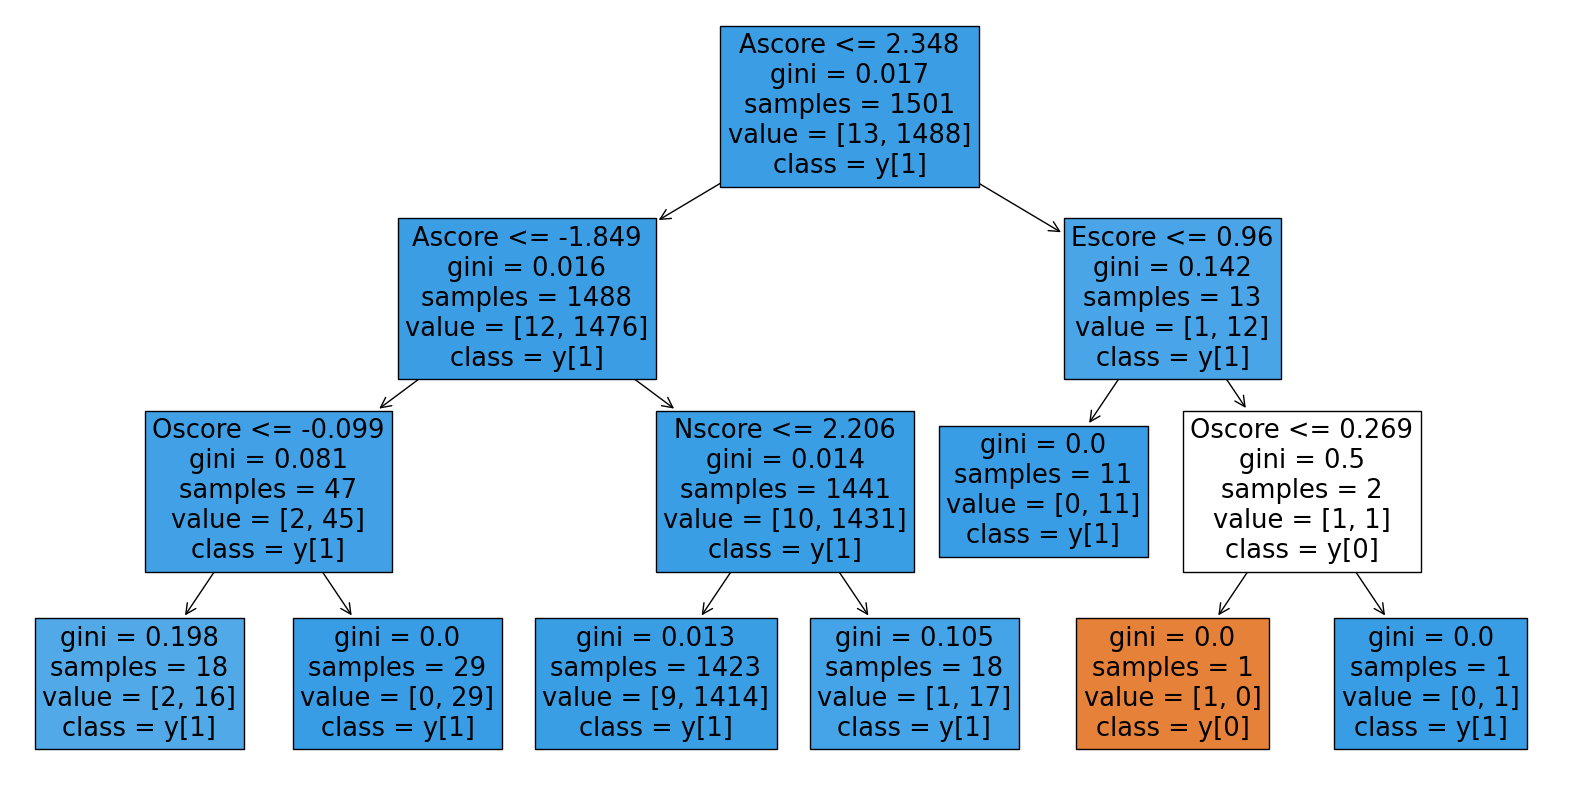

In [69]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model_personality, filled=True, feature_names=X_train_personality.columns, class_names=True)
plt.show()

In [70]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [71]:
#Neaural Network
learning_rate = 0.0001
nn_model_personality = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_personality.fit(X_train_personality, y_train)
y_train_pred_nn_personality = nn_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_nn_personality = nn_model_personality.predict(X_test_personality)
train_accuracy_nn_personality = accuracy_score(y_train, y_train_pred_nn_personality)
test_accuracy_nn_personality = accuracy_score(y_test, y_test_pred_nn_personality)

In [72]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_personality = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
#Stochastic Gradient Discent
learning_date = 0.0001
sgd_model_personality = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_personality.fit(X_train_personality, y_train)
y_train_pred_sgd_personality = sgd_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_sgd_personality = sgd_model_personality.predict(X_test_personality)
train_accuracy_sgd_personality = accuracy_score(y_train, y_train_pred_sgd_personality)
test_accuracy_sgd_personality = accuracy_score(y_test, y_test_pred_sgd_personality)

In [74]:
print("Personality Category:") #Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personality}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_personality}")

Personality Category:
Decision Tree Model:
Overall Training Accuracy: 0.9920053297801465
Overall Testing Accuracy: 0.9867021276595744
Neural Network Model:
Overall Training Accuracy: 0.9913391072618255
Overall Testing Accuracy: 0.9893617021276596
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.9913391072618255
Overall Testing Accuracy: 0.9893617021276596


### Risk-seeking

In [75]:
X_risk_seeking = risk_seeking_df#Definint X and y
y = df_cleaned[drug_category]

In [76]:
X_train_risk_seeking, X_test_risk_seeking, y_train, y_test = train_test_split(X_risk_seeking, y, test_size=0.2, random_state=42)
#Train test split

In [77]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [78]:
#Decision Tree
max_depth = 3
dt_model_risk_seeking = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_dt_risk_seeking = accuracy_score(y_train, y_train_pred_dt_risk_seeking)
test_accuracy_dt_risk_seeking = accuracy_score(y_test, y_test_pred_dt_risk_seeking)

In [79]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [80]:
#Neural Network
learning_rate = 0.0001
nn_model_risk_seeking = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_nn_risk_seeking = accuracy_score(y_train, y_train_pred_nn_risk_seeking)
test_accuracy_nn_risk_seeking = accuracy_score(y_test, y_test_pred_nn_risk_seeking)

In [81]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_risk_seeking = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [82]:
#Stochastic Gradient Descent
learning_date = 0.0001
sgd_model_risk_seeking = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_sgd_risk_seeking = accuracy_score(y_train, y_train_pred_sgd_risk_seeking)
test_accuracy_sgd_risk_seeking = accuracy_score(y_test, y_test_pred_sgd_risk_seeking)

In [83]:
print("Risk-Seeking Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_risk_seeking}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_risk_seeking}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_risk_seeking}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_risk_seeking}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_risk_seeking}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_risk_seeking}")

Risk-Seeking Category:
Decision Tree Model:
Overall Training Accuracy: 0.9913391072618255
Overall Testing Accuracy: 0.9893617021276596
Neural Network Model:
Overall Training Accuracy: 0.9913391072618255
Overall Testing Accuracy: 0.9893617021276596
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.9913391072618255
Overall Testing Accuracy: 0.9893617021276596


## Modeling for category 2 drugs

### Demographics

In [84]:
drug_category = 'Cat2' #Defining category

In [85]:
X_demographics = demographics_df #Defining X features and y targets
y = df_cleaned[drug_category]

In [86]:
X_train_demographics, X_test_demographics, y_train, y_test = train_test_split(X_demographics, y, test_size=0.2, random_state=42, stratify=X_demographics['Age'])
#Train test split

In [87]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [88]:
#Decision Tree
max_depth = 3
dt_model_demographics = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_dt_demographics = dt_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_dt_demographics = dt_model_demographics.predict(X_test_demographics)
train_accuracy_dt_demographics = accuracy_score(y_train, y_train_pred_dt_demographics)
test_accuracy_dt_demographics = accuracy_score(y_test, y_test_pred_dt_demographics)

In [89]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
#Neaural Network
learning_rate = 0.0001
nn_model_demographics = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_nn_demographics = nn_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_nn_demographics = nn_model_demographics.predict(X_test_demographics)
train_accuracy_nn_demographics = accuracy_score(y_train, y_train_pred_nn_demographics)
test_accuracy_nn_demographics = accuracy_score(y_test, y_test_pred_nn_demographics)

In [91]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_demographics = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


In [92]:
#Stochastic Gradient Discent
learning_date = 0.001
sgd_model_demographics = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_sgd_demographics = sgd_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_sgd_demographics = sgd_model_demographics.predict(X_test_demographics)
train_accuracy_sgd_demographics = accuracy_score(y_train, y_train_pred_sgd_demographics)
test_accuracy_sgd_demographics = accuracy_score(y_test, y_test_pred_sgd_demographics)

In [93]:
print("Demographics Category:") #Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_demographics}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_demographics}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_demographics}")

Demographics Category:
Decision Tree Model:
Overall Training Accuracy: 0.754163890739507
Overall Testing Accuracy: 0.7420212765957447
Neural Network Model:
Overall Training Accuracy: 0.7574950033311126
Overall Testing Accuracy: 0.7606382978723404
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.7008660892738174
Overall Testing Accuracy: 0.7393617021276596


### Personality

In [94]:
X_personality = personality_df #Defining X and y
y = df_cleaned[drug_category]

In [95]:
X_train_personality, X_test_personality, y_train, y_test = train_test_split(X_personality, y, test_size=0.2, random_state=42)
#Train test split

In [96]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [97]:
#Decision Tree
max_depth = 3
dt_model_personality = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_personality.fit(X_train_personality, y_train)
y_train_pred_dt_personality = dt_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_dt_personality = dt_model_personality.predict(X_test_personality)
train_accuracy_dt_personality = accuracy_score(y_train, y_train_pred_dt_personality)
test_accuracy_dt_personality = accuracy_score(y_test, y_test_pred_dt_personality)

In [98]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
#Neaural Network
learning_rate = 0.01
nn_model_personality = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_personality.fit(X_train_personality, y_train)
y_train_pred_nn_personality = nn_model_personality.predict(X_train_personality) #Making / Evaluating predictions
y_test_pred_nn_personality = nn_model_personality.predict(X_test_personality)
train_accuracy_nn_personality = accuracy_score(y_train, y_train_pred_nn_personality)
test_accuracy_nn_personality = accuracy_score(y_test, y_test_pred_nn_personality)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_personality = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
#Stochastic Gradient Discent
learning_date = 0.001
sgd_model_personality = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_personality.fit(X_train_personality, y_train)
y_train_pred_sgd_personality = sgd_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_sgd_personality = sgd_model_personality.predict(X_test_personality)
train_accuracy_sgd_personality = accuracy_score(y_train, y_train_pred_sgd_personality)
test_accuracy_sgd_personality = accuracy_score(y_test, y_test_pred_sgd_personality)

In [102]:
print("Personality Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personality}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_personality}")

Personality Category:
Decision Tree Model:
Overall Training Accuracy: 0.7794803464357095
Overall Testing Accuracy: 0.7553191489361702
Neural Network Model:
Overall Training Accuracy: 0.8001332445036642
Overall Testing Accuracy: 0.7526595744680851
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.7501665556295802
Overall Testing Accuracy: 0.7180851063829787


### Risk-seeking

In [103]:
X_risk_seeking = risk_seeking_df#Printing X and y
y = df_cleaned[drug_category]

In [104]:
X_train_risk_seeking, X_test_risk_seeking, y_train, y_test = train_test_split(X_risk_seeking, y, test_size=0.2, random_state=42)
#Train test split

In [105]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [106]:
#Decision Tree
max_depth = 3
dt_model_risk_seeking = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_dt_risk_seeking = accuracy_score(y_train, y_train_pred_dt_risk_seeking)
test_accuracy_dt_risk_seeking = accuracy_score(y_test, y_test_pred_dt_risk_seeking)

In [107]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.01}


In [108]:
#Neural Network
learning_rate = 0.001
nn_model_risk_seeking = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_nn_risk_seeking = accuracy_score(y_train, y_train_pred_nn_risk_seeking)
test_accuracy_nn_risk_seeking = accuracy_score(y_test, y_test_pred_nn_risk_seeking)

In [109]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_risk_seeking = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [110]:
#Stochastic Gradient Descent
learning_date = 0.0001
sgd_model_risk_seeking = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_sgd_risk_seeking = accuracy_score(y_train, y_train_pred_sgd_risk_seeking)
test_accuracy_sgd_risk_seeking = accuracy_score(y_test, y_test_pred_sgd_risk_seeking)

In [111]:
print("Risk-Seeking Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personality}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_personality}")

Risk-Seeking Category:
Decision Tree Model:
Overall Training Accuracy: 0.7794803464357095
Overall Testing Accuracy: 0.7553191489361702
Neural Network Model:
Overall Training Accuracy: 0.8001332445036642
Overall Testing Accuracy: 0.7526595744680851
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.7501665556295802
Overall Testing Accuracy: 0.7180851063829787


## Modeling for category 1 drugs

### Demographics

In [112]:
drug_category = 'Cat1'#Defining category

In [113]:
X_demographics = demographics_df #Defining X features and y targets
y = df_cleaned[drug_category]

In [114]:
X_train_demographics, X_test_demographics, y_train, y_test = train_test_split(X_demographics, y, test_size=0.2, random_state=42, stratify=X_demographics['Age'])
#Train test split

In [115]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5}


In [116]:
#Decision Tree
max_depth = 5
dt_model_demographics = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_dt_demographics = dt_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_dt_demographics = dt_model_demographics.predict(X_test_demographics)
train_accuracy_dt_demographics = accuracy_score(y_train, y_train_pred_dt_demographics)
test_accuracy_dt_demographics = accuracy_score(y_test, y_test_pred_dt_demographics)

In [117]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [118]:
#Neaural Network
learning_rate = 0.001
nn_model_demographics = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_nn_demographics = nn_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_nn_demographics = nn_model_demographics.predict(X_test_demographics)
train_accuracy_nn_demographics = accuracy_score(y_train, y_train_pred_nn_demographics)
test_accuracy_nn_demographics = accuracy_score(y_test, y_test_pred_nn_demographics)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [119]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_demographics = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [120]:
#Stochastic Gradient Discent
learning_date = 0.0001
sgd_model_demographics = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_demographics.fit(X_train_demographics, y_train)
y_train_pred_sgd_demographics = sgd_model_demographics.predict(X_train_demographics)#Making / Evaluating predictions
y_test_pred_sgd_demographics = sgd_model_demographics.predict(X_test_demographics)
train_accuracy_sgd_demographics = accuracy_score(y_train, y_train_pred_sgd_demographics)
test_accuracy_sgd_demographics = accuracy_score(y_test, y_test_pred_sgd_demographics)

In [121]:
print("Demographics Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_demographics}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_demographics}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_demographics}")

Demographics Category:
Decision Tree Model:
Overall Training Accuracy: 0.7321785476349101
Overall Testing Accuracy: 0.6888297872340425
Neural Network Model:
Overall Training Accuracy: 0.7315123251165889
Overall Testing Accuracy: 0.6968085106382979
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.6988674217188541
Overall Testing Accuracy: 0.7047872340425532


### Personality

In [122]:
X_personality = personality_df #Defining X and y
y = df_cleaned[drug_category]

In [123]:
X_train_personality, X_test_personality, y_train, y_test = train_test_split(X_personality, y, test_size=0.2, random_state=42)
#Train test split

In [124]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5}


In [125]:
#Decision Tree
max_depth = 5
dt_model_personality = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_personality.fit(X_train_personality, y_train)
y_train_pred_dt_personality = dt_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_dt_personality = dt_model_personality.predict(X_test_personality)
train_accuracy_dt_personality = accuracy_score(y_train, y_train_pred_dt_personality)
test_accuracy_dt_personality = accuracy_score(y_test, y_test_pred_dt_personality)

In [126]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
#Neaural Network
learning_rate = 0.01
nn_model_personality = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_personality.fit(X_train_personality, y_train)
y_train_pred_nn_personality = nn_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_nn_personality = nn_model_personality.predict(X_test_personality)
train_accuracy_nn_personality = accuracy_score(y_train, y_train_pred_nn_personality)
test_accuracy_nn_personality = accuracy_score(y_test, y_test_pred_nn_personality)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [128]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_personality = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_personality, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.0001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
#Stochastic Gradient Discent
learning_date = 0.0001
sgd_model_personality = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_personality.fit(X_train_personality, y_train)
y_train_pred_sgd_personality = sgd_model_personality.predict(X_train_personality)#Making / Evaluating predictions
y_test_pred_sgd_personality = sgd_model_personality.predict(X_test_personality)
train_accuracy_sgd_personality = accuracy_score(y_train, y_train_pred_sgd_personality)
test_accuracy_sgd_personality = accuracy_score(y_test, y_test_pred_sgd_personality)

In [130]:
print("Personality Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personality}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_personality}")

Personality Category:
Decision Tree Model:
Overall Training Accuracy: 0.7408394403730846
Overall Testing Accuracy: 0.6382978723404256
Neural Network Model:
Overall Training Accuracy: 0.7428381079280479
Overall Testing Accuracy: 0.6968085106382979
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.7228514323784144
Overall Testing Accuracy: 0.7074468085106383


### Risk-seeking

In [131]:
X_risk_seeking = risk_seeking_df#Defining X and y
y = df_cleaned[drug_category]

In [132]:
X_train_risk_seeking, X_test_risk_seeking, y_train, y_test = train_test_split(X_risk_seeking, y, test_size=0.2, random_state=42)
#Train test split

In [133]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [134]:
#Decision Tree
max_depth = 3
dt_model_risk_seeking = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_dt_risk_seeking = dt_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_dt_risk_seeking = accuracy_score(y_train, y_train_pred_dt_risk_seeking)
test_accuracy_dt_risk_seeking = accuracy_score(y_test, y_test_pred_dt_risk_seeking)

In [135]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.0001}


In [136]:
#Neural Network
learning_rate = 0.01
nn_model_risk_seeking = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_nn_risk_seeking = nn_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_nn_risk_seeking = accuracy_score(y_train, y_train_pred_nn_risk_seeking)
test_accuracy_nn_risk_seeking = accuracy_score(y_test, y_test_pred_nn_risk_seeking)

In [137]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

sgd_model_risk_seeking = SGDClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_risk_seeking, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.01}


In [138]:
#Stochastic Gradient Descent
learning_date = 0.01
sgd_model_risk_seeking = SGDClassifier(alpha = learning_rate) #Defining and fitting model
sgd_model_risk_seeking.fit(X_train_risk_seeking, y_train)
y_train_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_train_risk_seeking)#Making / Evaluating predictions
y_test_pred_sgd_risk_seeking = sgd_model_risk_seeking.predict(X_test_risk_seeking)
train_accuracy_sgd_risk_seeking = accuracy_score(y_train, y_train_pred_sgd_risk_seeking)
test_accuracy_sgd_risk_seeking = accuracy_score(y_test, y_test_pred_sgd_risk_seeking)

In [139]:
print("Personality Category:")#Printing results
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personality}")

print("Neural Network Model:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

print("Stochastic Gradient Descent Model:")
print(f"Overall Training Accuracy: {train_accuracy_sgd_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_sgd_personality}")

Personality Category:
Decision Tree Model:
Overall Training Accuracy: 0.7408394403730846
Overall Testing Accuracy: 0.6382978723404256
Neural Network Model:
Overall Training Accuracy: 0.7428381079280479
Overall Testing Accuracy: 0.6968085106382979
Stochastic Gradient Descent Model:
Overall Training Accuracy: 0.7228514323784144
Overall Testing Accuracy: 0.7074468085106383


# Part C

| Drug Category | Best Feature Category | Model Type | Overall training accuracy | Overall testing accuracy |
|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Cat 1   |  Demographics   |   Neural Network   |  0.7342   |  0.6968   |
|  Cat 2   |  Personality + Risk-seeking   |   Neural Network   |  0.7974   |  0.7580   |
|  Cat 3   |  Personality   |  Decision Tree   |  0.9920   |  0.9894   |
|   Cat 4  |   Demographics  |  Decision Tree   |  1.0   |  1.0   |

# Discussion of parts A, B, and C
To begin, in part A I decided that I would use Decision Tree models, Neural Network models, and Stochastic Gradient Descent (SGD) models in my analysis. I chose to use decision tree models as I find this method to be easily interpretable and simple to visualize if needed. I chose to use neural networks as this method is effective for complex relationships and there are a lot of complex features within this dataset. Finally, I chose to use SGD as I know it is a relatively efficient method type for training and evaluating models. Within analyses dealing with the demographic features, I chose to stratify the "Age" variable as I recognize that all ages are not represented equally among the data set and age likely has a significant impact on whether an individual has tried a specific drug or not. Each model (regardless of model type) was optimized using a grid search to find the optimal max-depth for decision trees and alpha values for neural networks and SGD. Visualizations for some decision tree models that performed extremely well are included as well. The dataset was split into three different categories (Demographic, Personality, and Risk-seeking) to further facilitate the model fitting and analysis process. All cases where an individual reported using the drug "Semer" were removed from the dataset to take out any cases of false reporting by individuals.

For the category 1 drugs, the demographics feature category best predictied the target category of drug usage. More specifically, the neural network model was most effective out of all of the models tested. This model reported an overall training accuracy of 0.7342 and an overall testing accuracy of 0.6968. Both accuracies reported similar values, which shows that this model only overfits the training data slightly and performs relatively well to unseen data. Based on the grid search optimization results, 0.001 was used as the learning rate for this particular model. In general, this model performed the worst at predicting whether an individual has tried drugs (compared to the other models dealing with the other categories); however, given the above accuracy scores, this model still performs well in this classification problem. The reason for this is likely due to the fact that less individuals have tried category 1 drugs than category 2, 3, and 4 drugs, meaning it is tougher for the model to identify these individuals compared to drug categories that have had the majority of individuals report having tried those drugs.

For the category 2 drugs, the personality and risk seeking categories best predicted the target category of drug usage. Similar to category 1, the neural network models worked best when compared to the other models. The reported accuracy on the training and testing sets of data are as follows: 0.7974 and 0.7580 respectively. These models were rendered the best because both accuracy scores combined were higher than those of the other tested models. This model was also slightly overfitted, but not quite as badly as some of the others. This model performed well at predicting whether someone has tried category 2 drugs, and reported higher accuracy scores than the category 1 models, but lower scores than the category 3 and 4 models.

For the category 3 drugs, the personality category best predicted the target category of drug usage. The decision tree model appeared to perform best out of all of the models used within this category of drugs. This model reported accuracy scores on the training and testing sets of data of 0.9920 and 0.9894, which are the highest values reported up until this point. This model barely overfit any of the data and both the training and testing accuracy scores are extremely high, which shows that this models predictions are mostly correct. The max depth of this decision tree was determined using the grid search previously mentions and the max depth value was found to be 3. This decision tree was also visualized to show its effectiveness in predicting whether an individual has tried category 3 drugs based on their personality.

For the category 4 drugs, the demographics category performed the best when predicting whether an individual has tried category 4 drugs. More specifically, the decision tree model performed the best out of all of the model tried in this category. This model reported a training and testing accuracy score of 1.0, meaning the model was perfect when classifying individuals on both the training and testing set. The max depth of this decision tree was determined to be 5, which was used in the model fitting process and the visualization of the decision tree. The reason that the model has an 100% accuracy is likely due to the fact that the majority of people in the study, and in general, have tried category 4 drugs at some point in their lives. This allows the model to easily predict that all individuals have tried these drugs, leading to very high / perfect accuracy scores.

# Part D: Separation based on sex

In [140]:
gender_codes = df_d['Gender'].unique() #Finding codes for gender variable
print(gender_codes)

[ 0.48246 -0.48246]


In [141]:
female_df = df_cleaned[df_cleaned['Gender'] > 0] #Creating new df for only females

In [142]:
male_df = df_cleaned[df_cleaned['Gender'] < 0] #Creating new df for only males

In [143]:
new_demographics = ["Age","Education","Country","Ethnicity"]#Defining demographics without gender as it's aldrady split

In [144]:
female_new_df = female_df[new_demographics]#Making new df for females that is trimmed
female_new_df#Printing df

,Age,Education,Country,Ethnicity
0,0.49788,-0.05921,0.96082,0.12600
3,-0.95197,1.16365,0.96082,-0.31685
4,0.49788,1.98437,0.96082,-0.31685
5,2.59171,-1.22751,0.24923,-0.31685
8,0.49788,-0.05921,0.24923,-0.31685
...,...,...,...,...
1867,-0.95197,-0.61113,-0.57009,-0.31685
1870,-0.07854,0.45468,-0.28519,-0.31685
1880,-0.95197,-0.61113,-0.57009,-0.31685
1882,-0.07854,0.45468,-0.57009,-0.31685


In [145]:
male_new_df = male_df[new_demographics]#Making new df for males that is trimmed
male_new_df #Printing new df

,Age,Education,Country,Ethnicity
1,-0.07854,1.98437,0.96082,-0.31685
2,0.49788,-0.05921,0.96082,-0.31685
6,1.09449,1.16365,-0.57009,-0.31685
7,0.49788,-1.73790,0.96082,-0.31685
9,1.82213,1.16365,0.96082,-0.31685
...,...,...,...,...
1877,-0.95197,-1.43719,-0.57009,-0.31685
1878,-0.95197,0.45468,0.24923,-0.31685
1879,-0.95197,-0.61113,-0.28519,-0.31685
1881,-0.95197,-0.61113,-0.57009,-0.31685


In [146]:
personalities = ["Nscore","Escore","Oscore","Ascore","Cscore"]#Defining Personalities

In [147]:
female_new_df_p = female_df[personalities]#Making new df for females that is trimmed
female_new_df_p#Printing df

,Nscore,Escore,Oscore,Ascore,Cscore
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612
5,-0.67825,-0.30033,-1.55521,2.03972,1.63088
8,0.62967,2.57309,-0.97631,0.76096,1.13407
...,...,...,...,...,...
1867,1.13281,-0.43999,0.29338,-0.76096,-0.14277
1870,-1.05308,0.96248,1.88511,1.81866,1.30612
1880,-1.19430,1.74091,1.88511,0.76096,-1.13788
1882,1.13281,-1.37639,-1.27553,-1.77200,-1.38502


In [148]:
male_new_df_p = male_df[personalities]#Making new df for females that is trimmed
male_new_df_p#Printing df

,Nscore,Escore,Oscore,Ascore,Cscore
1,-0.67825,1.93886,1.43533,0.76096,-0.14277
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450
6,-0.46725,-1.09207,-0.45174,-0.30172,0.93949
7,-1.32828,1.93886,-0.84732,-0.30172,1.63088
9,-0.24649,0.00332,-1.42424,0.59042,0.12331
...,...,...,...,...,...
1877,1.49158,-1.92173,-0.58331,-1.77200,0.58489
1878,-0.05188,-1.76250,0.88309,-0.76096,2.33337
1879,-0.79151,0.32197,0.29338,-0.30172,-0.27607
1881,-0.24649,1.74091,0.58331,0.76096,-1.51840


## Modeling for category 4 drugs

### Female

In [149]:
drug_category = 'Cat4' #Defining category

In [150]:
X_female_demographics = female_new_df #Defining X features and y targets
y = female_df[drug_category]

In [151]:
X_train_female_demographics, X_test_female_demographics, y_train, y_test = train_test_split(X_female_demographics, y, test_size=0.2, random_state=42, stratify=X_female_demographics['Age'])
#Train test split

In [152]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_female_demographics, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [153]:
max_depth = 3
dt_model_demographics = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_demographics.fit(X_train_female_demographics, y_train)
y_train_pred_dt_demographics = dt_model_demographics.predict(X_train_female_demographics)#Making / Evaluating predictions
y_test_pred_dt_demographics = dt_model_demographics.predict(X_test_female_demographics)
train_accuracy_dt_demographics = accuracy_score(y_train, y_train_pred_dt_demographics)
test_accuracy_dt_demographics = accuracy_score(y_test, y_test_pred_dt_demographics)
print("Demographics Category for female:")
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_demographics}")

Demographics Category for female:
Decision Tree Model:
Overall Training Accuracy: 1.0
Overall Testing Accuracy: 0.9946808510638298


### Male

In [154]:
X_male_demographics = male_new_df #Defining X features and y targets
y = male_df[drug_category]

In [155]:
X_train_male_demographics, X_test_male_demographics, y_train, y_test = train_test_split(X_male_demographics, y, test_size=0.2, random_state=42, stratify=X_male_demographics['Age'])
#Train test split

In [156]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_male_demographics, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [157]:
max_depth = 3
dt_model_demographics = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_demographics.fit(X_train_male_demographics, y_train)
y_train_pred_dt_demographics = dt_model_demographics.predict(X_train_male_demographics)#Making / Evaluating predictions
y_test_pred_dt_demographics = dt_model_demographics.predict(X_test_male_demographics)
train_accuracy_dt_demographics = accuracy_score(y_train, y_train_pred_dt_demographics)
test_accuracy_dt_demographics = accuracy_score(y_test, y_test_pred_dt_demographics)
print("Demographics Category for male:")
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_demographics}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_demographics}")

Demographics Category for male:
Decision Tree Model:
Overall Training Accuracy: 1.0
Overall Testing Accuracy: 1.0


## Modeling for category 3 drugs

### Female

In [158]:
drug_category = 'Cat3'#Defining category

In [159]:
X_female_personalities = female_new_df_p #Defining X features and y targets
y = female_df[drug_category]

In [160]:
X_train_female_personalities, X_test_female_personalities, y_train, y_test = train_test_split(X_female_personalities, y, test_size=0.2, random_state=42)
#Train test split

In [161]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_female_personalities, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [162]:
max_depth = 3
dt_model_personalities = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_personalities.fit(X_train_female_personalities, y_train)
y_train_pred_dt_personalities = dt_model_personalities.predict(X_train_female_personalities)#Making / Evaluating predictions
y_test_pred_dt_personalities = dt_model_personalities.predict(X_test_female_personalities)
train_accuracy_dt_personalities = accuracy_score(y_train, y_train_pred_dt_personalities)
test_accuracy_dt_personalities = accuracy_score(y_test, y_test_pred_dt_personalities)
print("Demographics Category for female:")
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personalities}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personalities}")

Demographics Category for female:
Decision Tree Model:
Overall Training Accuracy: 0.9946595460614153
Overall Testing Accuracy: 0.9787234042553191


### Male

In [163]:
X_male_personalities = male_new_df_p #Defining X features and y targets
y = male_df[drug_category]

In [164]:
X_train_male_personalities, X_test_male_personalities, y_train, y_test = train_test_split(X_male_personalities, y, test_size=0.2, random_state=42)
#Train test split

In [165]:
param_grid = {
    'max_depth': [3, 5, 7, 10]  # Range of max_depth values for gridsearch
}

dt_classifier = DecisionTreeClassifier()#Performing gridsearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_male_personalities, y_train)
# Printing the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [166]:
max_depth = 3
dt_model_personalities = DecisionTreeClassifier(max_depth = max_depth) #Defining and fitting model
dt_model_personalities.fit(X_train_male_personalities, y_train)
y_train_pred_dt_personalities = dt_model_personalities.predict(X_train_male_personalities)#Making / Evaluating predictions
y_test_pred_dt_personalities = dt_model_personalities.predict(X_test_male_personalities)
train_accuracy_dt_personalities = accuracy_score(y_train, y_train_pred_dt_personalities)
test_accuracy_dt_personalities = accuracy_score(y_test, y_test_pred_dt_personalities)
print("Demographics Category for male:")
print("Decision Tree Model:")
print(f"Overall Training Accuracy: {train_accuracy_dt_personalities}")
print(f"Overall Testing Accuracy: {test_accuracy_dt_personalities}")

Demographics Category for male:
Decision Tree Model:
Overall Training Accuracy: 0.9933510638297872
Overall Testing Accuracy: 0.9787234042553191


## Modeling for category 2 drugs

### Female

In [167]:
drug_category = 'Cat2'#Defining category

In [168]:
X_female_personalities = female_new_df_p #Defining X features and y targets
y = female_df[drug_category]

In [169]:
X_train_female_personalities, X_test_female_personalities, y_train, y_test = train_test_split(X_female_personalities, y, test_size=0.2, random_state=42)
#Train test split

In [170]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier(max_iter=1000) #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_female_personalities, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters: {'alpha': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [171]:
#Neaural Network
learning_rate = 0.001
nn_model_female_personality = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_female_personality.fit(X_train_female_personalities, y_train)
y_train_pred_nn_personality = nn_model_female_personality.predict(X_train_female_personalities)#Making / Evaluating predictions
y_test_pred_nn_personality = nn_model_female_personality.predict(X_test_female_personalities)
train_accuracy_nn_personality = accuracy_score(y_train, y_train_pred_nn_personality)
test_accuracy_nn_personality = accuracy_score(y_test, y_test_pred_nn_personality)
print("Personality Category:")
print("Neural Network Model female:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

Personality Category:
Neural Network Model female:
Overall Training Accuracy: 0.7489986648865153
Overall Testing Accuracy: 0.648936170212766


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Male

In [172]:
X_male_personalities = male_new_df_p #Defining X features and y targets
y = male_df[drug_category]

In [173]:
X_train_male_personalities, X_test_male_personalities, y_train, y_test = train_test_split(X_male_personalities, y, test_size=0.2, random_state=42)
#Train test split

In [174]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_male_personalities, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [175]:
#Neaural Network
learning_rate = 0.01
nn_model_male_personality = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_male_personality.fit(X_train_male_personalities, y_train)
y_train_pred_nn_personality = nn_model_male_personality.predict(X_train_male_personalities)#Making / Evaluating predictions
y_test_pred_nn_personality = nn_model_male_personality.predict(X_test_male_personalities)
train_accuracy_nn_personality = accuracy_score(y_train, y_train_pred_nn_personality)
test_accuracy_nn_personality = accuracy_score(y_test, y_test_pred_nn_personality)
print("Personality Category:") #Printing results
print("Neural Network Model male:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

Personality Category:
Neural Network Model male:
Overall Training Accuracy: 0.8590425531914894
Overall Testing Accuracy: 0.8670212765957447


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Modeling for category 1 drugs

### Female

In [176]:
drug_category = 'Cat1'#Defining category

In [177]:
X_female_demographics = female_new_df #Defining X features and y targets
y = female_df[drug_category]

In [178]:
X_train_female_demographics, X_test_female_demographics, y_train, y_test = train_test_split(X_female_demographics, y, test_size=0.2, random_state=42, stratify=X_female_demographics['Age'])
#Train test split

In [179]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_female_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters: {'alpha': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [180]:
#Neaural Network
learning_rate = 0.001
nn_model_demographics = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_demographics.fit(X_train_female_demographics, y_train)
y_train_pred_nn_demographics = nn_model_demographics.predict(X_train_female_demographics)#Making / Evaluating predictions
y_test_pred_nn_demographics = nn_model_demographics.predict(X_test_female_demographics)
train_accuracy_nn_demographics = accuracy_score(y_train, y_train_pred_nn_demographics)
test_accuracy_nn_demographics = accuracy_score(y_test, y_test_pred_nn_demographics)
print("Demographics Category:") #Printing results
print("Neural Network Model female:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

Demographics Category:
Neural Network Model female:
Overall Training Accuracy: 0.8590425531914894
Overall Testing Accuracy: 0.8670212765957447


### Male

In [181]:
X_male_demographics = male_new_df #Defining X features and y targets
y = male_df[drug_category]

In [182]:
X_train_male_demographics, X_test_male_demographics, y_train, y_test = train_test_split(X_male_demographics, y, test_size=0.2, random_state=42, stratify=X_male_demographics['Age'])
#Train test split

In [183]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # Creating range of alpha / learning rate values
}

nn_classifier = MLPClassifier() #Performing gridsearch
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_male_demographics, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [184]:
#Neaural Network
learning_rate = 0.01
nn_model_demographics = MLPClassifier(alpha = learning_rate) #Defining and fitting model
nn_model_demographics.fit(X_train_male_demographics, y_train)
y_train_pred_nn_demographics = nn_model_demographics.predict(X_train_male_demographics)#Making / Evaluating predictions
y_test_pred_nn_demographics = nn_model_demographics.predict(X_test_male_demographics)
train_accuracy_nn_demographics = accuracy_score(y_train, y_train_pred_nn_demographics)
test_accuracy_nn_demographics = accuracy_score(y_test, y_test_pred_nn_demographics)
print("Demographics Category:")#Printing results
print("Neural Network Model male:")
print(f"Overall Training Accuracy: {train_accuracy_nn_personality}")
print(f"Overall Testing Accuracy: {test_accuracy_nn_personality}")

Demographics Category:
Neural Network Model male:
Overall Training Accuracy: 0.8590425531914894
Overall Testing Accuracy: 0.8670212765957447


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Discussion of Part D
For part D, I opted to separate the dataset by sex and evaluate whether the best performing models from parts A, B, and C differed when predicting drug usage for males versus females. For category 1 drugs, the neural network model classified female and male drug usage identically. Both models reported values of 0.8564 and 0.8670 on the training and testing sets of data. This implies that separating the data based on sex does not result in significantly different classification predictions for category 1 drugs. For category 2 drugs, the neural network models reported slightly different accuracy scores. The model classifying females reported an accuracy score of 0.7489 and 0.6489 on the training and testing sets of data. The model classifying males reported accuracy scores of 0.8564 and 0.8670, respectively. The higher accuracy scores for this model show that the model was more accurate at predicting drug category 2 usage for males than females. For category 3 drugs, the decision tree model reported accuracy scores of 0.9947 and 0.9787 on the predictions for females and whether they have used category 3 drugs. Conversely, the model reported accuracy scores of 0.9934 and 0.9840 on the predictions of whether males have used category 3 drugs. These accuracy scores are extremely similar, but the model that predicts female usage of category 3 drugs overfits slightly more than the model predicting male usage of the same drugs. Finally, the decision tree models predicting category 4 drug usage report very similar accuracy scores. The model predicting female usage of category 4 drugs reports accuracy scores of 1.0 and 0.9947, wheras the model predicting male usage reports scores of 1.0 and 1.0 on the training and testing sets respectively. Both models appear to perform very well to unseen data with the model predicting female usage overfitting slightly more than the model predicting male usage. In general, only predictions of drug usage appearing to be different based on sex are category 2 drugs. The category 1, 3, and 4 drugs report very similar accuracy scores and are not affected by sex.